<center><h1>Point Cloud classification using deep learning. </h1></center>
<center><h4>(generating 3D models from point clouds)</h4></center>

In [1]:
from arcgis.learn import export_point_dataset, prepare_data, PointCNN

# <i>PART A</i>: for 3D Building models

<h2>Exporting the data from LAS files</h2>

In [3]:
path = r'data_\input'
output_path = r'data_\export'

In [ ]:
export_point_dataset(path, output_path, extra_features=[('intensity', 5000, 0), ('num_returns', 5, 0)])   

<h2> Preparing the data for model training </h2>

In [4]:
colormap = {'0':[255,0,0], '1':[20,123,240], '2':[255,0,45], '3':[20,25,20], '4':[255,66,0], '5':[20,90,20], '6':[255,0,33], '7':[20,80,90], '8':[25,79,60], '9':[70,120,120]}

In [5]:
data = prepare_data(output_path, dataset_type='PointCloud', batch_size=2, transforms=None, color_mapping=colormap)

In [ ]:
data.show_batch(1)

The output from `show_batch( )` will display a 3D view of a random block within a batch.
As shown in the figure below:
![show_batch.gif](img/show_batch.gif)

<h2>Training the model</h2>

In [29]:
pc = PointCNN(data)

In [19]:
pc._data.classes

[0, 1]

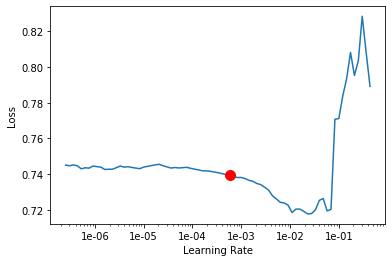

0.0005754399373371565

In [8]:
pc.lr_find()

In [9]:
pc.fit(15, 0.0005754399373371565, early_stopping=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.332195,0.237140,0.924130,1:52:08
1,0.235514,0.145923,0.954341,1:45:18
2,0.212749,0.143809,0.954955,1:43:04
3,0.171458,0.178612,0.931577,1:43:16
4,0.175261,0.163094,0.944441,3:38:45
5,0.141523,0.163715,0.952164,1:49:48
6,0.110648,0.201771,0.955076,1:44:03


Epoch 7: early stopping


In [14]:
pc.save('building vs EE_int.')

WindowsPath('data_/models/building vs EE_int.')

<h2>Visualizing the results</h2>

In [ ]:
pc.show_results(1)

The output from `show_results( )` will display a 3D view of a random block within a batch, for training data & its corresponding block from validation data.
As shown in the figure below:
![show_results.gif](img/show_results.gif)

In [10]:
pc.predict_las(r'data_\pred', r'data_\pred_out')

WindowsPath('data_/pred_out')

# <i>PART B</i>: for 3D Tree models

<p>In general, it is harder to train for high vegetation/Tree points, as compared to building points, due to lack of good training data, complex nature of tree points etc. Here, we have trained another model which can classify tree points with a very high completeness but low correctness, i.e. it overestimates tree points.
It does the job, but using it will result in increased post-processing effort to remove noise (overestimated points). 
</p>
<br>
To tackle this, & reduce our post-processing efforts, we trained another model for 4 classes: Ground, Building, Bridges & Everything Else (Trees, cars etc.), on Netherland's data. Where we use the feature of "selective classify". To get the best possible correctness & completeness, using both the models. 

<h2>Using the trained models for classification</h2>

In [14]:
A=PointCNN.from_model(r"models\6_class_model_int5k_ret5\6_class_model_int5k_ret5.emd")

In [6]:
A._data.classes

[0, 1, 2, 3, 4, 7]

In [9]:
A.predict_las(path=r"pred-in", 
              output_path=r'pred-out',
              print_metrics=False)

WindowsPath('pred-out')

In [10]:
B=PointCNN.from_model(r"models\model_4_class_alldata_int5k_ret5\model_4_class_alldata_int5k_ret5.emd")

In [11]:
B._data.classes

[2, 5, 6, 7]

In [12]:
B.predict_las(path=r"pred-out", 
              output_path=r'final_output',
              remap_classes={2:10,6:10,7:10},
              selective_classify=[10],
              print_metrics=False)

WindowsPath('final_output')

In [ ]:
uk._data.classes

<h5>Using both the models, this final output has the best possible correctness & completeness.</h5>